In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json
from Bio import SeqIO
import scipy.stats

In [2]:
mut_and_host_info_file = "../../intermediate-results-only-camels/mut_and_host_info_by_tip.json"
with open(mut_and_host_info_file, 'r') as infile:
    mut_and_host_info_by_tip = json.load(infile)

In [3]:
def extract_gene_lengths(genbank_file):
    gene_lengths = {}
    for record in SeqIO.parse(genbank_file, "genbank"):
        for feature in record.features:
            if feature.type == "mat_peptide": 
                gene_name = feature.qualifiers.get("product", ["unknown"])[0]
                gene_name = gene_name.replace(' protein', "")
                gene_length = len(feature.location)
                gene_lengths[gene_name.lower()] = gene_length / 3
            elif feature.type == "CDS":  
                gene_name = feature.qualifiers.get("gene", ["unknown"])[0]
                gene_length = len(feature.location)
                gene_lengths[gene_name.lower()] = gene_length / 3
        gene_lengths['rdrp'] = gene_lengths.pop("rna-dependent rna polymerase")
        gene_lengths['2Omethyltransferase'] = gene_lengths.pop("2'-o-methyltransferase")
    return gene_lengths

genbank_file = "../../../nextstrain-build/phylogenetic_only_camels/defaults/mers_reference.gb"

gene_codon_counts = extract_gene_lengths(genbank_file)
gene_codon_counts["s1"] = 2196 / 3
gene_codon_counts["s2"] = 1806 / 3

In [4]:
all_genes = set()
for info in mut_and_host_info_by_tip.values():
    all_genes.update(info['muts_on_path'].keys())

data = []
for tip, info in mut_and_host_info_by_tip.items():
    row = {'sample': tip, 'date': info['date']}
    for gene in all_genes:
        if gene == "RdRpa" or gene == "RdRpb":
            num_mutations = len(info['muts_on_path'].get("RdRpa", [])) + len(info['muts_on_path'].get("RdRpb", []))
            num_codons = gene_codon_counts["rdrp"] # default to 1 if gene not found
            mutation_rate = num_mutations / num_codons
            row["rdrp"] = mutation_rate
        else:
            num_mutations = len(info['muts_on_path'].get(gene, []))
            gene = gene.lower()
            if gene == "2omethyltransferase":
                num_codons = gene_codon_counts['2Omethyltransferase']
            else:
                num_codons = gene_codon_counts[gene]
            mutation_rate = num_mutations / num_codons
            row[gene] = mutation_rate
    data.append(row)

df = pd.DataFrame(data)

mutation_rate_by_gene = df.to_csv('../../intermediate-results-only-camels/mutation_rate_by_gene.csv')

<Figure size 640x480 with 0 Axes>

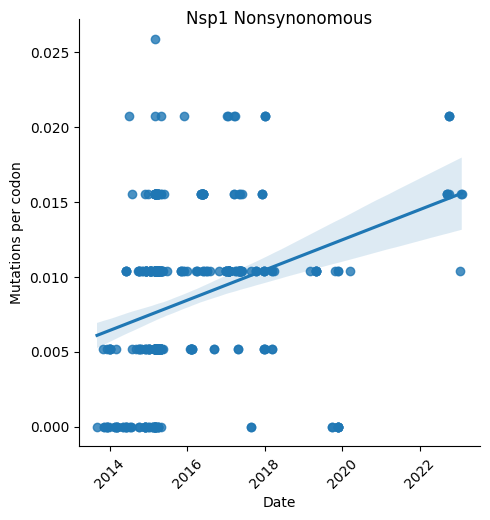

Camel slope: 0.0010070674086323018 mutations per codon per year
P = 2.0440882109542043e-11


<Figure size 640x480 with 0 Axes>

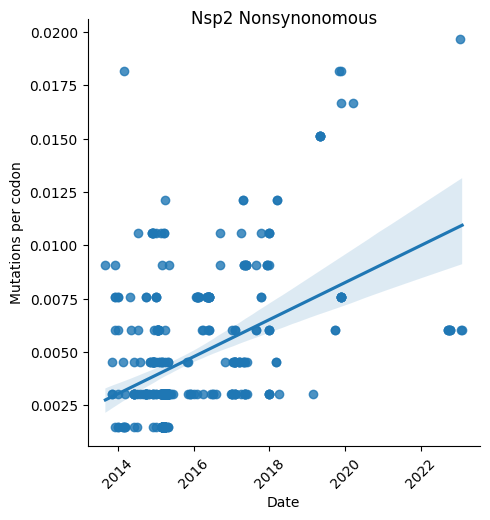

Camel slope: 0.0008689235955594995 mutations per codon per year
P = 9.896398013321705e-23


<Figure size 640x480 with 0 Axes>

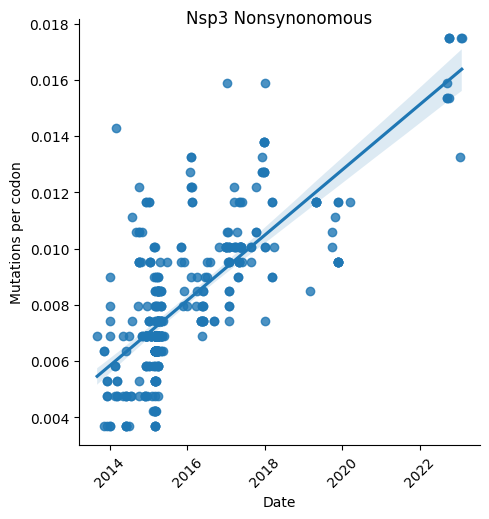

Camel slope: 0.0011589010558481624 mutations per codon per year
P = 1.0560219768066676e-75


<Figure size 640x480 with 0 Axes>

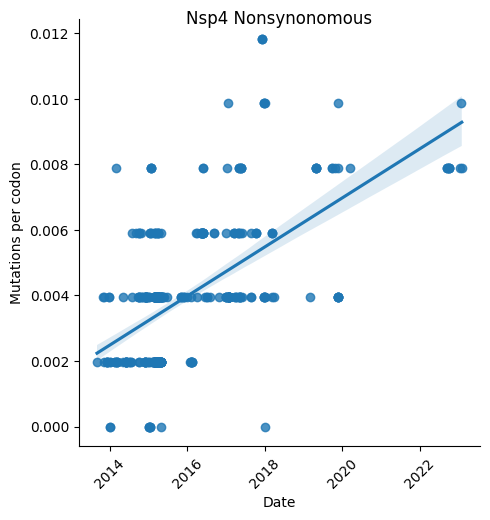

Camel slope: 0.000747514826754565 mutations per codon per year
P = 6.781398502033056e-42


<Figure size 640x480 with 0 Axes>

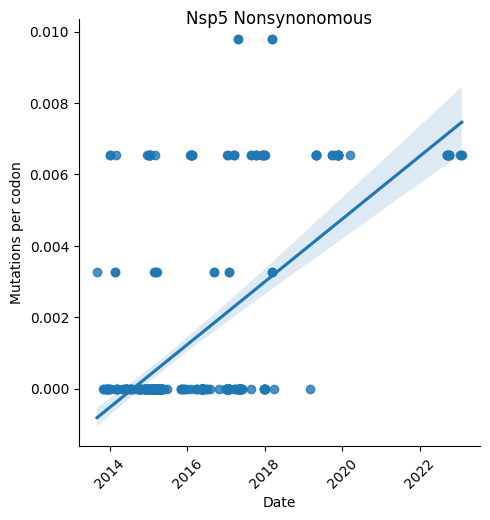

Camel slope: 0.0008784639162771792 mutations per codon per year
P = 2.705602194137054e-40


<Figure size 640x480 with 0 Axes>

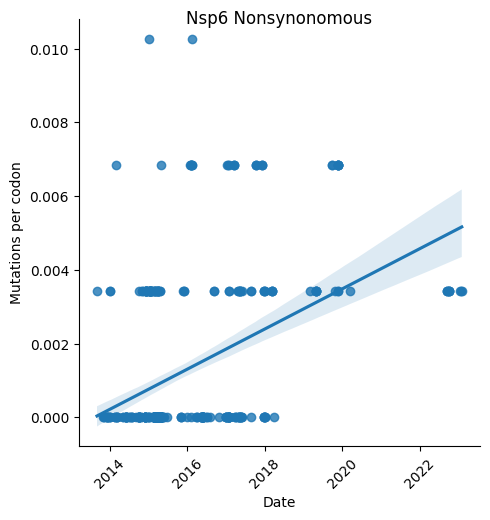

Camel slope: 0.0005440196823984182 mutations per codon per year
P = 1.844564214393927e-19


<Figure size 640x480 with 0 Axes>

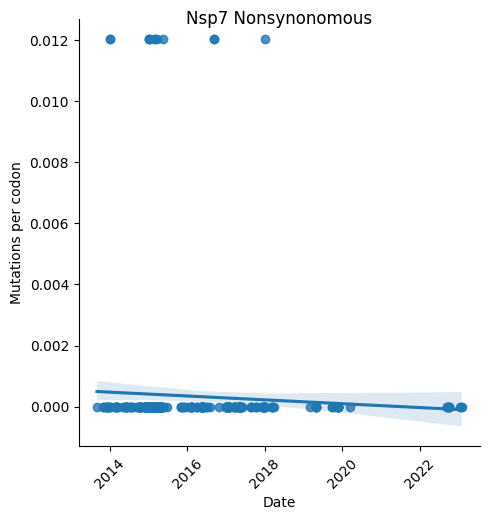

Camel slope: -6.303424348102007e-05 mutations per codon per year
P = 0.2838922108919399


<Figure size 640x480 with 0 Axes>

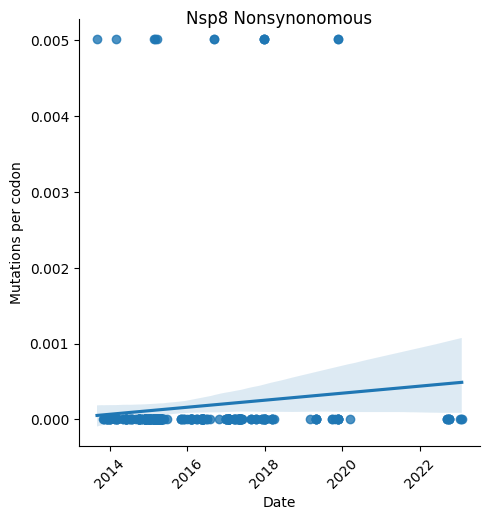

Camel slope: 4.6369232814622245e-05 mutations per codon per year
P = 0.06867601895815624


<Figure size 640x480 with 0 Axes>

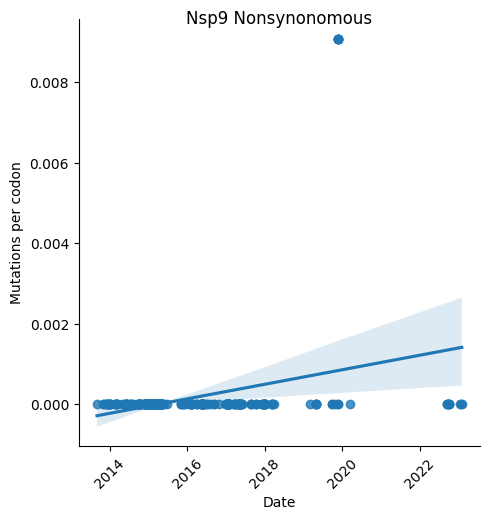

Camel slope: 0.0001802421110016468 mutations per codon per year
P = 6.086574305921793e-09


<Figure size 640x480 with 0 Axes>

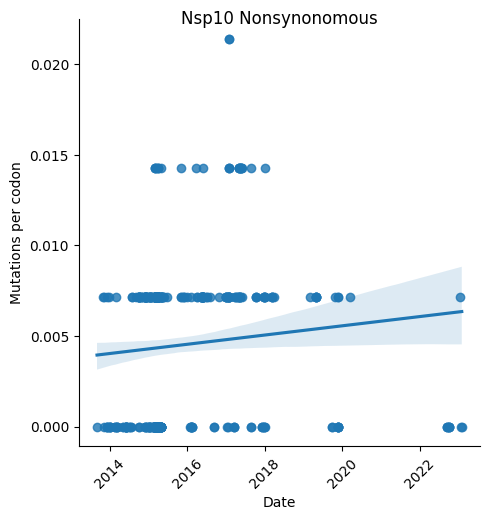

Camel slope: 0.0002548152017554686 mutations per codon per year
P = 0.04810805823394124


<Figure size 640x480 with 0 Axes>

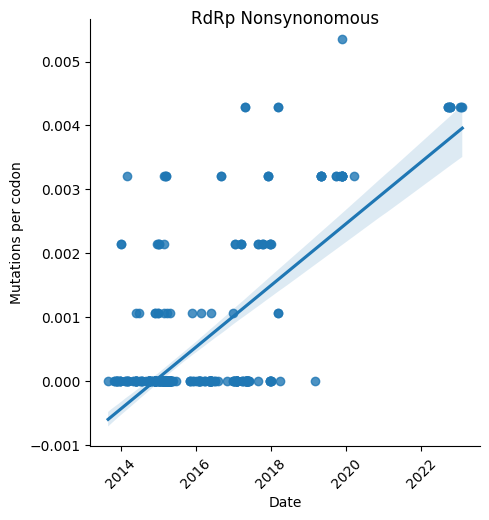

Camel slope: 0.00048346726837476004 mutations per codon per year
P = 6.434801910841503e-63


<Figure size 640x480 with 0 Axes>

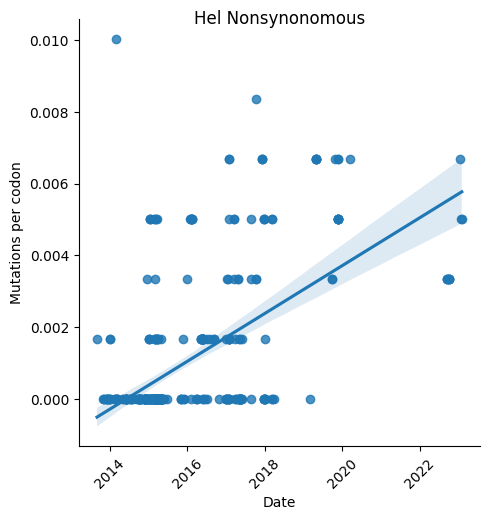

Camel slope: 0.0006652407909914928 mutations per codon per year
P = 1.906678383942963e-38


<Figure size 640x480 with 0 Axes>

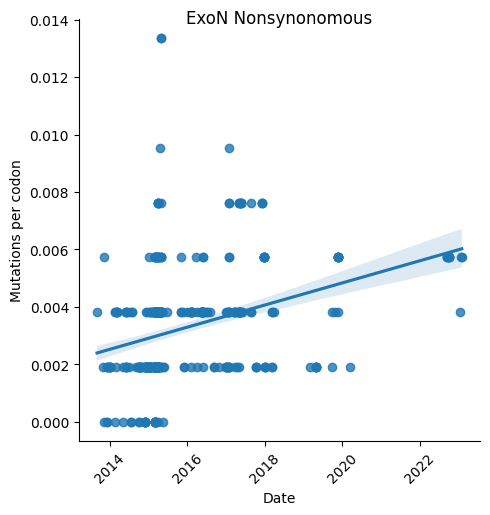

Camel slope: 0.00038493176329308177 mutations per codon per year
P = 2.541331192115323e-12


<Figure size 640x480 with 0 Axes>

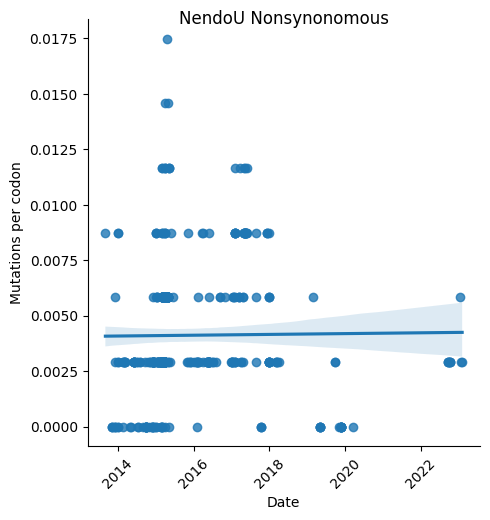

Camel slope: 1.8152974543235947e-05 mutations per codon per year
P = 0.8322904404278441


<Figure size 640x480 with 0 Axes>

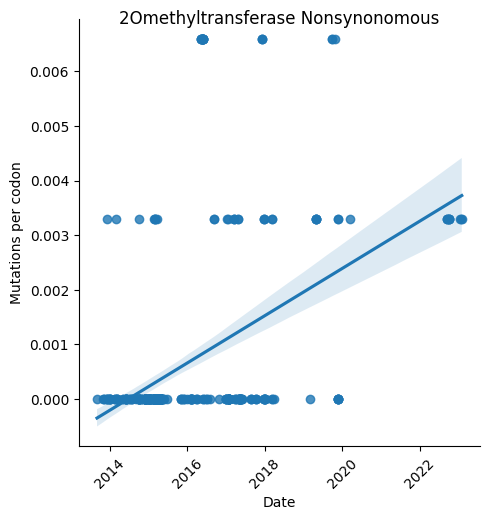

Camel slope: 0.00043258439311473496 mutations per codon per year
P = 3.403404555725198e-21


<Figure size 640x480 with 0 Axes>

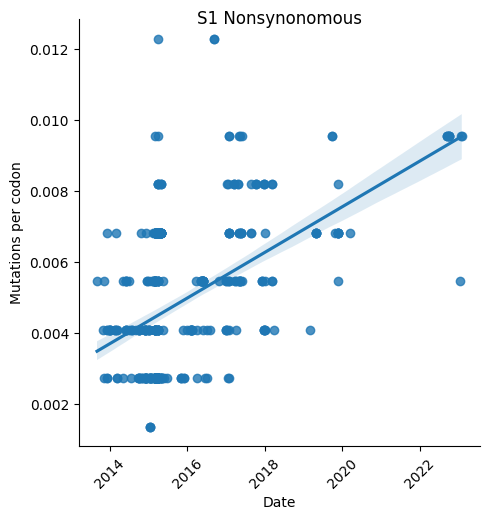

Camel slope: 0.0006422601575005405 mutations per codon per year
P = 3.5021832216955704e-30


<Figure size 640x480 with 0 Axes>

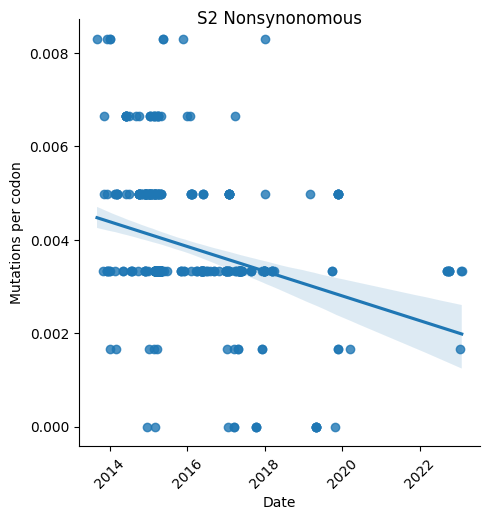

Camel slope: -0.0002642557525135096 mutations per codon per year
P = 7.558370209461885e-11


<Figure size 640x480 with 0 Axes>

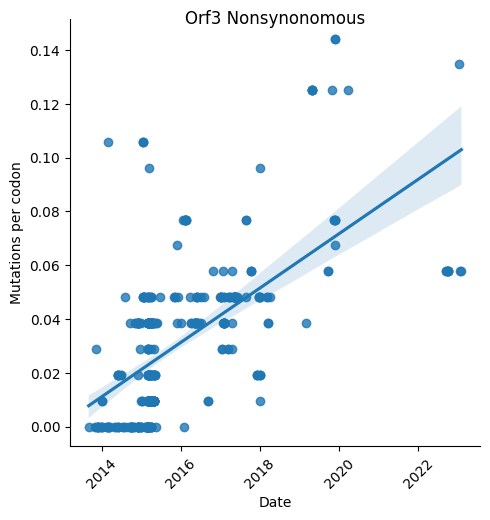

Camel slope: 0.010101718141599698 mutations per codon per year
P = 5.86966338109911e-45


<Figure size 640x480 with 0 Axes>

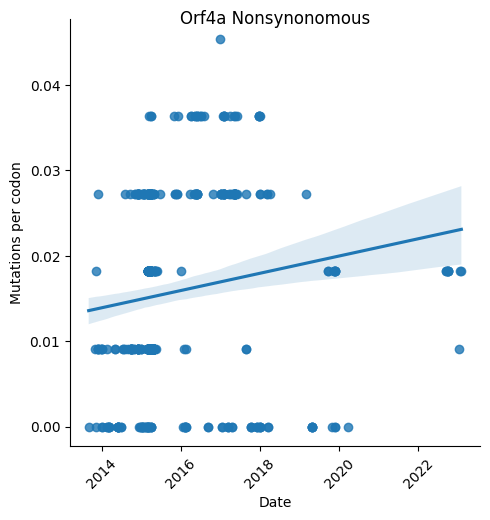

Camel slope: 0.001010491901428117 mutations per codon per year
P = 0.002254805896240356


<Figure size 640x480 with 0 Axes>

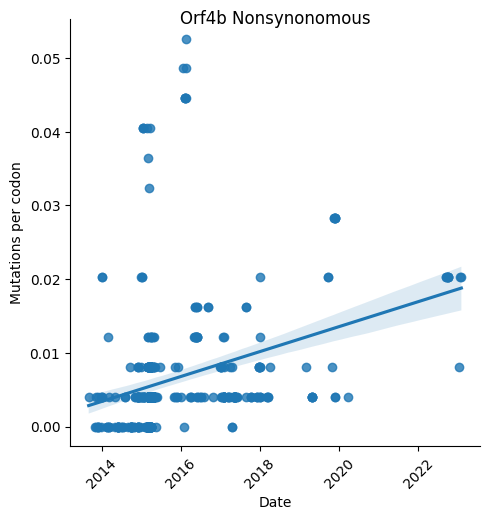

Camel slope: 0.0016916022708253558 mutations per codon per year
P = 2.936653161780362e-11


<Figure size 640x480 with 0 Axes>

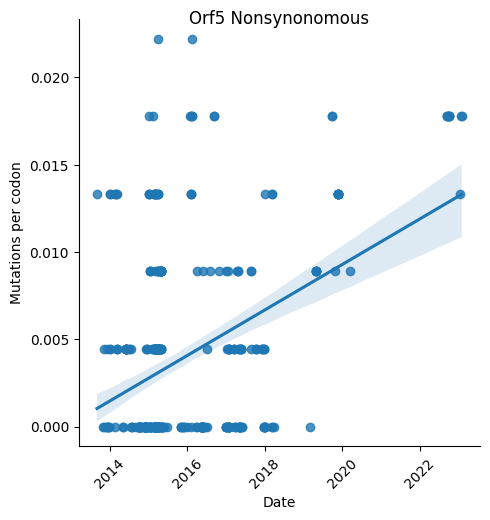

Camel slope: 0.001301986753124469 mutations per codon per year
P = 1.8988174785950746e-18


<Figure size 640x480 with 0 Axes>

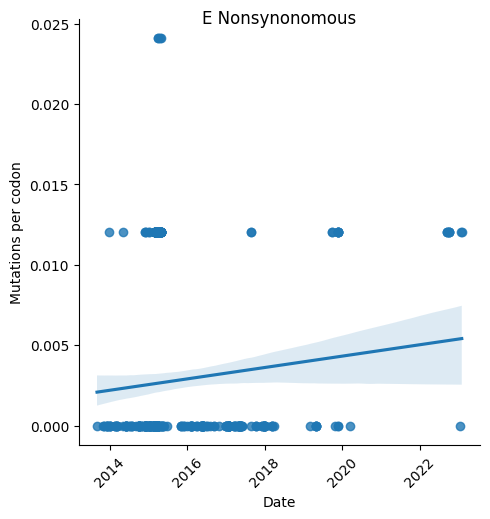

Camel slope: 0.0003535965157735143 mutations per codon per year
P = 0.024195299056818106


<Figure size 640x480 with 0 Axes>

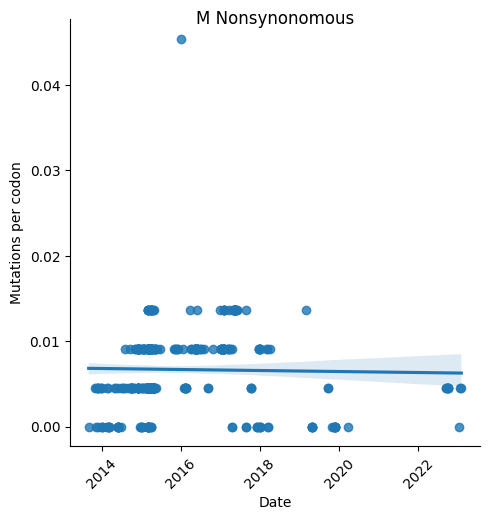

Camel slope: -5.8914820200448384e-05 mutations per codon per year
P = 0.6493847252072228


<Figure size 640x480 with 0 Axes>

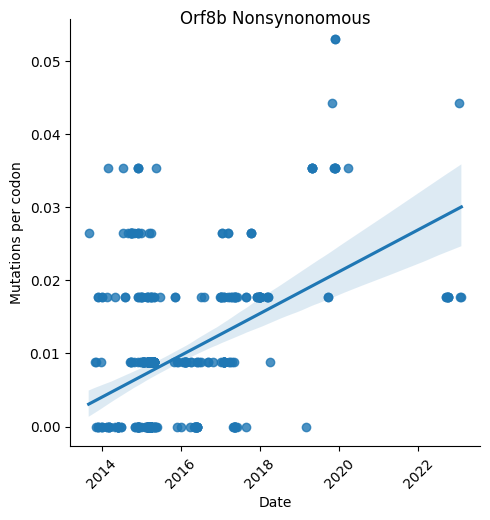

Camel slope: 0.0028644546523954456 mutations per codon per year
P = 1.0861659401592522e-23


<Figure size 640x480 with 0 Axes>

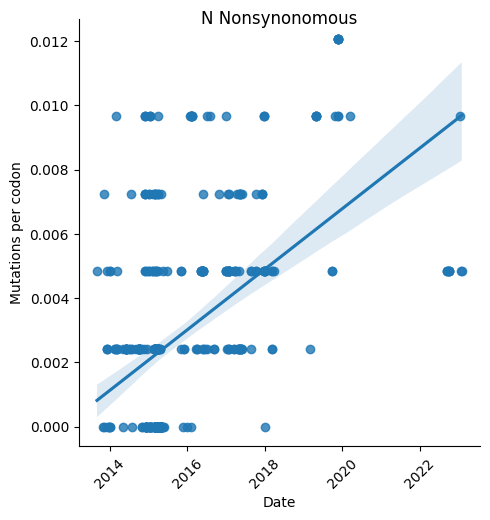

Camel slope: 0.0009416418389001744 mutations per codon per year
P = 3.6026619085637194e-27
           Nsp1      Nsp2      Nsp3      Nsp4      Nsp5      Nsp6      Nsp7  \
Camel  0.001007  0.000869  0.001159  0.000748  0.000878  0.000544 -0.000063   

           Nsp8     Nsp9     Nsp10  ...        S1        S2      Orf3  \
Camel  0.000046  0.00018  0.000255  ...  0.000642 -0.000264  0.010102   

         Orf4a     Orf4b      Orf5         E         M     Orf8b         N  
Camel  0.00101  0.001692  0.001302  0.000354 -0.000059  0.002864  0.000942  

[1 rows x 25 columns]


In [5]:
all_genes_simplified = ["Nsp1",
                 "Nsp2",
                 "Nsp3",
                 "Nsp4",
                 "Nsp5",
                 "Nsp6",
                 "Nsp7",
                 "Nsp8",
                 "Nsp9",
                 "Nsp10",
                 "RdRp",
                 "Hel",
                 "ExoN",
                 "NendoU",
                 "2Omethyltransferase",
                 "S1",
                 "S2",
                 "Orf3",
                 "Orf4a",
                 "Orf4b",
                 "Orf5",
                 "E",
                 "M",
                 "Orf8b",
                 "N"
                 ]

lin_regress = {}
lin_regress_all = {}
slopes = list(range(0, len(all_genes_simplified)))
count = 0
camel_df = df
for gene in all_genes_simplified:
    gene_lower = gene.lower()
    plt.figure(gene)
    plot = sns.lmplot(x="date", y=gene_lower, data=df)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Mutations per codon')
    plt.title(gene + ' Nonsynonomous', y=0.97)
    plt.show()
    # plt.savefig("../../../intermediate-results-downsampling/isolating_clade/mutation_rate_per_gene/" + gene + "figure.png")
    lin_regress[gene] = {}
    lin_regress_all[gene] = {}

    x=camel_df['date'].values
    y=camel_df[gene_lower].values
    camel_slope, camel_intercept, camel_r, camel_p, camel_se = stats.linregress(x, y)
    lin_regress[gene]['Camel'] = camel_slope
    lin_regress_all[gene]['Camel'] = {'slope':camel_slope, 'intercept':camel_intercept, 'r': camel_r, 'p': camel_p, 'se':camel_se}
    slopes[count] = camel_slope
    print("Camel slope: " + str(camel_slope) + " mutations per codon per year"),
    print("P = " + str(camel_p))
    count += 1


#print(lin_regress)
df_results = pd.DataFrame(lin_regress)
print(df_results)
df_results_all = pd.DataFrame(lin_regress_all)
linear_regression_results = df_results.to_csv('../../intermediate-results-only-camels/linear_regression_results.csv')
linear_regression_results_all = df_results_all.to_csv('../../intermediate-results-only-camels/linear_regression_results_all.csv')


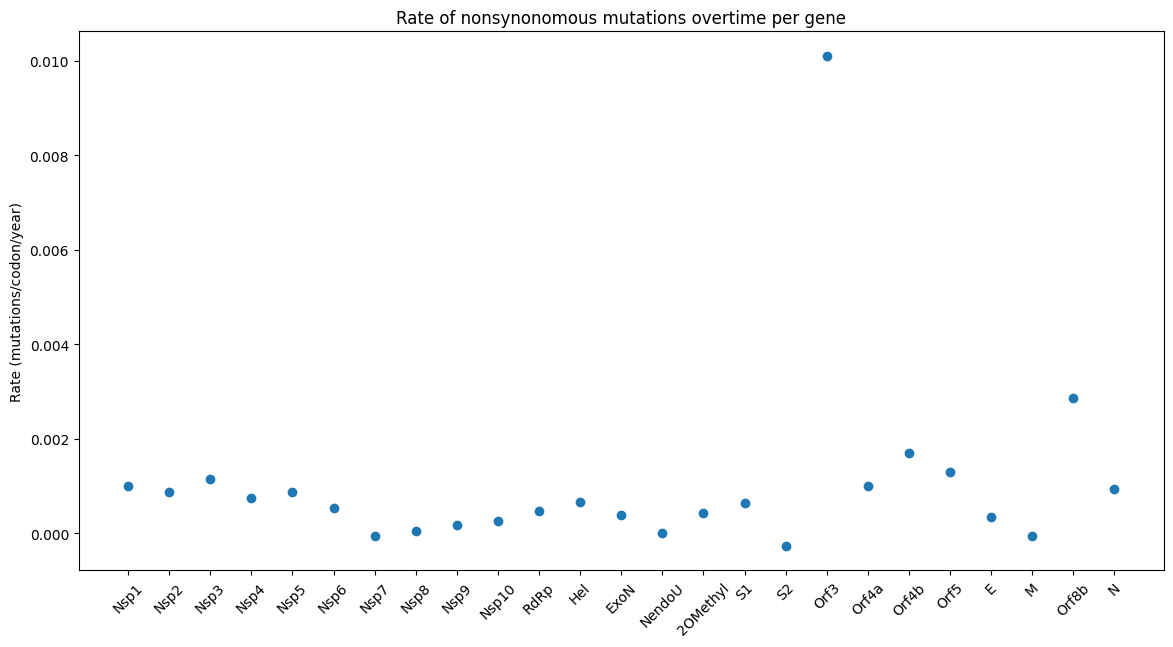

In [6]:
gene_names = list(all_genes_simplified)
for i in range(len(all_genes_simplified)):
    if all_genes_simplified[i] == '2Omethyltransferase':
        all_genes_simplified[i] = '2OMethyl'
plt.figure(figsize=(14,7))
plt.scatter(all_genes_simplified, slopes)
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
plt.ylabel("Rate (mutations/codon/year)")
plt.title("Rate of nonsynonomous mutations overtime per gene")
plt.show()